<a href="https://colab.research.google.com/github/Vaaya1176/Iris-Dataset-/blob/main/Predicting_Customer_Churn_for_a_Subscription_Service.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

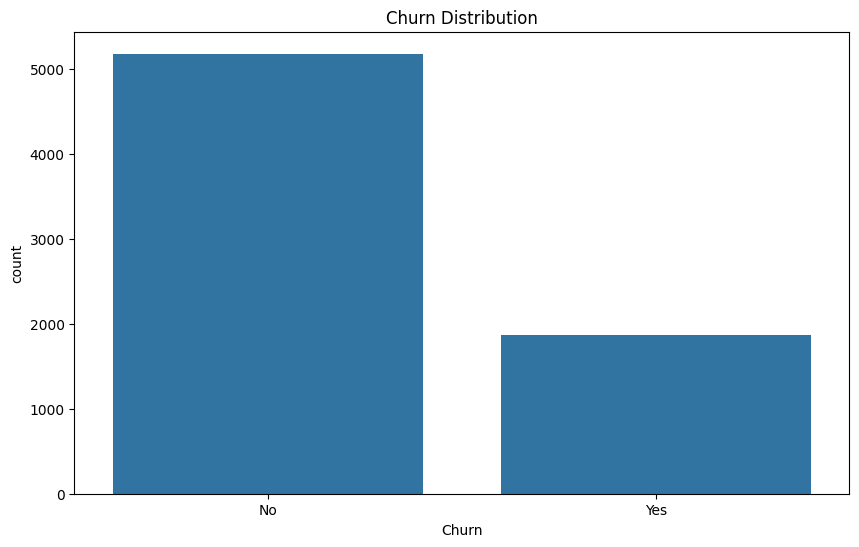

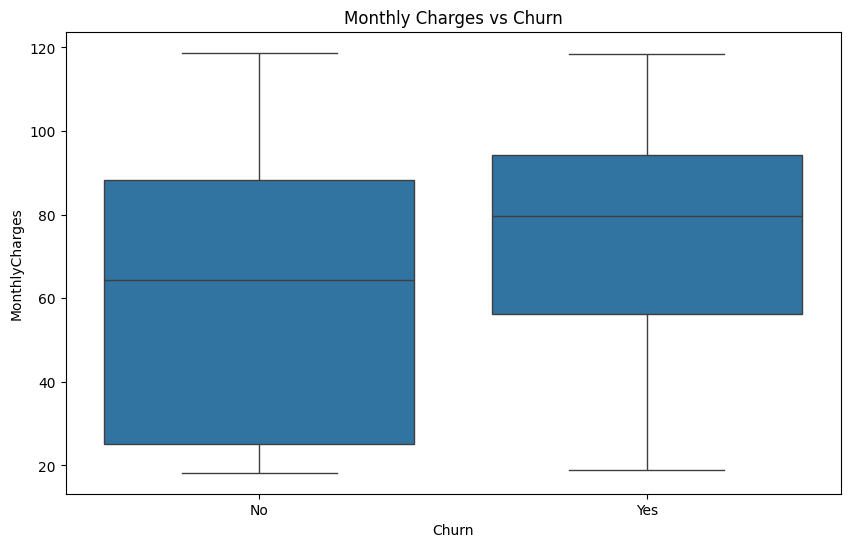

<ipython-input-3-14d7c8065cc8>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)



Accuracy Score: 0.7955997161107168

Confusion Matrix:
[[945  91]
 [197 176]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



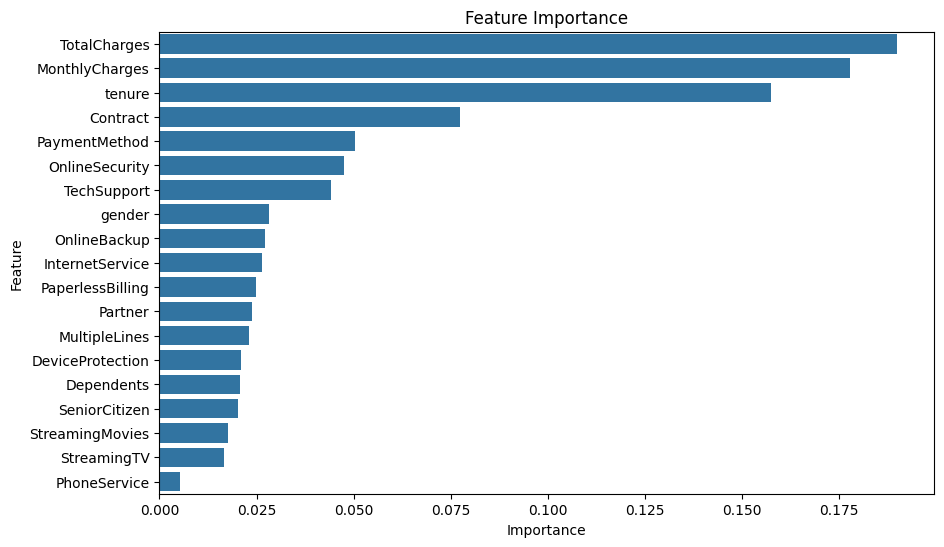


Recommendations:
1. Target customers on lower-tier subscription plans with personalized offers to reduce churn.
2. Improve customer support for customers raising frequent tickets.
3. Encourage engagement by offering tailored content for customers with low usage hours.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the dataset
import pandas as pd


# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Print the first few rows of the dataset
print(data.head())



# Exploring the dataset
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Analyzing patterns (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

# Cleaning the Data
# Checking for duplicates
data = data.drop_duplicates()

# Handling missing values
# Assuming that "TotalCharges" might have missing values, to handle that we are filling them with the median.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Encoding categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'].fillna('No'))
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'].fillna('No'))
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'].fillna('No'))
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'].fillna('No'))
data['TechSupport'] = le.fit_transform(data['TechSupport'].fillna('No'))
data['StreamingTV'] = le.fit_transform(data['StreamingTV'].fillna('No'))
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'].fillna('No'))
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['Churn'] = le.fit_transform(data['Churn'])

# Normalizing numerical features
scaler = StandardScaler()
data[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

# Spliting data into features and labels
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluating the model
y_pred = clf.predict(X_test)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

# Recommendations
print("\nRecommendations:")
print("1. Target customers on lower-tier subscription plans with personalized offers to reduce churn.")
print("2. Improve customer support for customers raising frequent tickets.")
print("3. Encourage engagement by offering tailored content for customers with low usage hours.")
